#**Facebook Social Circles Dataset Description**

**Source**

**Dataset Name:** Facebook Social Circles

**Provider:** Stanford Network Analysis Project (SNAP)

**File Name:** facebook_combined.txt

**Data Characteristics**

**Nodes (Users):** Each node represents a Facebook user (anonymized).

**Edges (Friendships):** Each undirected edge represents a friendship connection between two users.

**Edge format:** node1 node2 → meaning node1 and node2 are friends.

**Dataset Statistics**

**Attribute	Value**

**Number of Nodes:** 4,039

**Number of Edges:**	88,234

**Average Degree:**	~43.7

Type of Graph	**Undirected, Unweighted**

Number of Connected Components	**1 (fully connected)**

**Special Notes**

• It is an ego-network dataset: Data is collected from the perspective of certain users (ego nodes) along with their connections.

• No timestamps or user attributes are given—just the graph structure.

•  Community detection, Centrality analysis, Graph visualization.



#  Load the Facebook dataset

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


Source:

In [ ]:
file_path = "facebook_combined.txt"

#  Read the edge list

In [ ]:
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)


#  Basic info

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


#  Visualize a small subgraph (first 50 nodes for clarity)

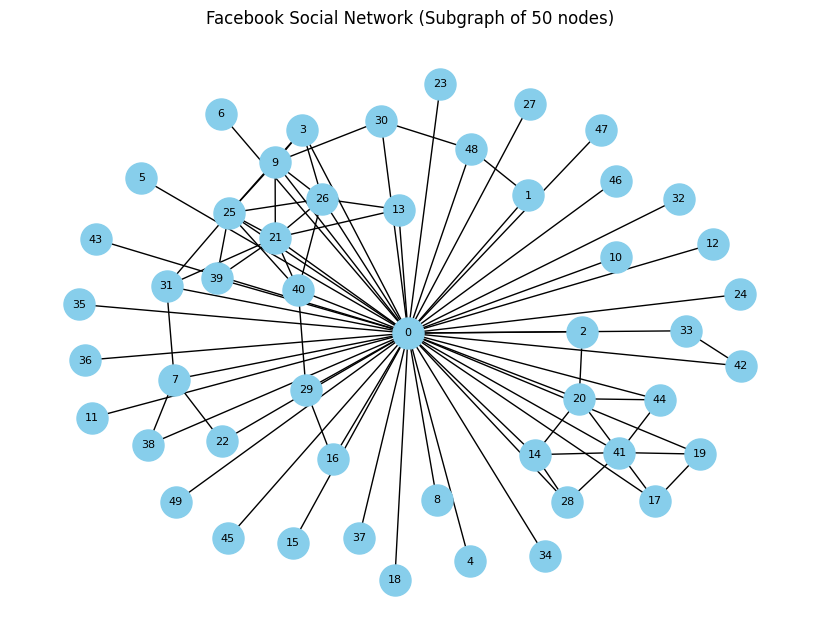

In [ ]:
plt.figure(figsize=(8, 6))
subgraph = G.subgraph(list(G.nodes())[:50])
nx.draw(subgraph, with_labels=True, node_color="skyblue", node_size=500, font_size=8)
plt.title("Facebook Social Network (Subgraph of 50 nodes)")
plt.show()


# Graph Representations
# Adjacency List

In [ ]:
adj_list = {node: list(G.neighbors(node)) for node in G.nodes()}
print("Sample Adjacency List:", dict(list(adj_list.items())[:5]))

Sample Adjacency List: {0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

# Adjacency Matrix

In [ ]:
adj_matrix = nx.to_numpy_array(G)
print("Adjacency Matrix shape:", adj_matrix.shape)

Adjacency Matrix shape: (4039, 4039)



# Edge List

In [ ]:
edge_list = list(G.edges())
print("Sample Edge List:", edge_list[:10])

Sample Edge List: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)]


#  Basic Transformations
# Add a node & edge

In [ ]:
G.add_node(5000)
G.add_edge(5000, 0)

# Add multiple edges at once
# Add multiple nodes at once


In [ ]:
G.add_nodes_from([6000, 12000, 13000])
G.add_edges_from([(6000, 0), (12000, 1), (13000, 2)])

# Remove a node

In [ ]:
G.remove_node(5000)


# Remove multiple nodes at once

# Remove multiple edges

In [ ]:
G.remove_nodes_from([11, 22])
G.remove_edges_from([(2, 3), (3, 4)])


# Step 7: Basic Graph Properties

In [ ]:
print("Degree of Node 0:", G.degree(0))
print("Connected Components:", nx.number_connected_components(G))

Degree of Node 0: 346
Connected Components: 1


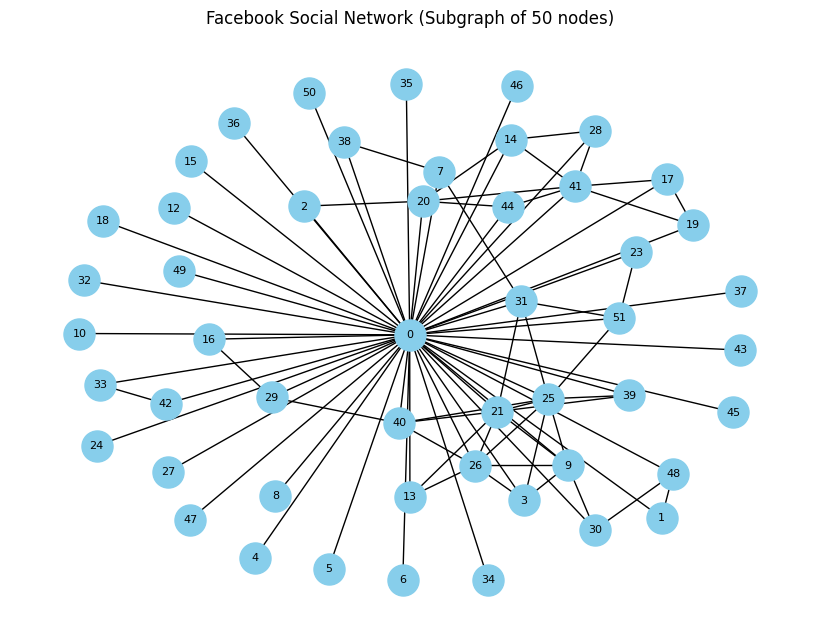

In [ ]:
plt.figure(figsize=(8, 6))
subgraph = G.subgraph(list(G.nodes())[:50])
nx.draw(subgraph, with_labels=True, node_color="skyblue", node_size=500, font_size=8)
plt.title("Facebook Social Network (Subgraph of 50 nodes)")
plt.show()

# Relabel nodes

In [ ]:
G = nx.relabel_nodes(G, {0: 'A', 1: 'B'})

# Mergining Nodes


In [ ]:
G = nx.Graph()
G.add_edges_from([(30, 1), (35, 2), (25, 2), (12, 3)])
u, v = 30, 25
w = 20000
G.add_node(w)
for neighbor in set(G.neighbors(u)).union(G.neighbors(v)):
    if neighbor != u and neighbor != v:  # Avoid self-loops
        G.add_edge(w, neighbor)
G.remove_nodes_from([u, v])
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 35, 2, 12, 3, 20000]
Edges: [(1, 20000), (35, 2), (2, 20000), (12, 3)]
